In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader as data#imported to scrap data from yahoo finance website

#if 100 day moving average is below 200 then down trend and if above then up trend

In [126]:
import yfinance as yf

start = '2010-01-01'
end = '2020-01-01'

# Fetch data for AAPL
df = yf.download('AAPL', start=start, end=end)

# Print the DataFrame(df)
print(df)





[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04   7.622500   7.660714   7.585000   7.643214   6.487534  493729600
2010-01-05   7.664286   7.699643   7.616071   7.656429   6.498749  601904800
2010-01-06   7.656429   7.686786   7.526786   7.534643   6.395379  552160000
2010-01-07   7.562500   7.571429   7.466071   7.520714   6.383555  477131200
2010-01-08   7.510714   7.571429   7.466429   7.570714   6.425996  447610800
...               ...        ...        ...        ...        ...        ...
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.327461   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.702927   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.676094  146266000
2019-12-30  72.364998  73.172501  71.305000  72.879997  71.095566  144114400
2019-12

In [127]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [128]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327461,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095566,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.615021,100805600


In [129]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [130]:
df= df.drop(['Date','Adj Close'], axis=1)#drop unncessary columns
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


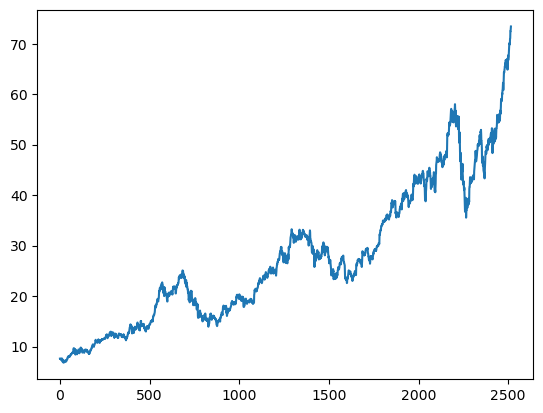

In [131]:
plt.plot(df.Close)

In [132]:
ma100=df.Close.rolling(100).mean()#moving average for 100 days
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

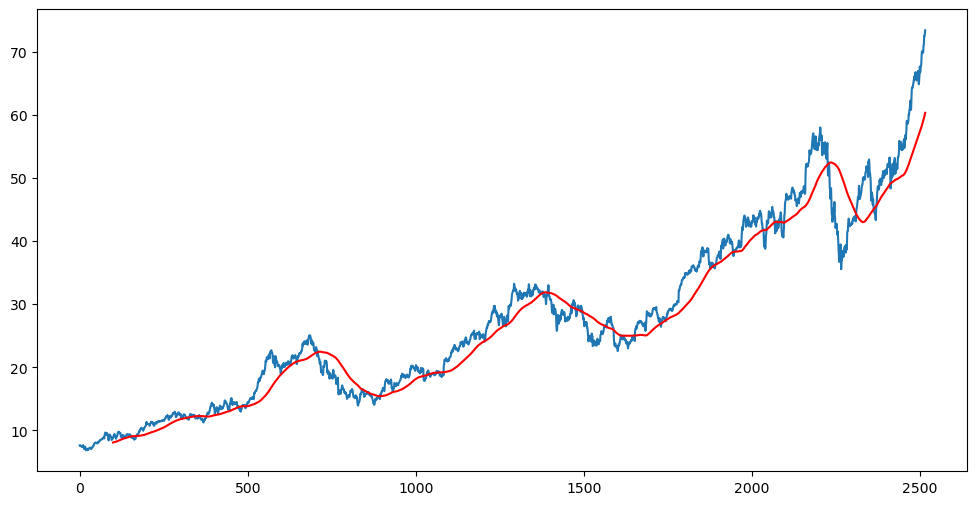

In [133]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [134]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

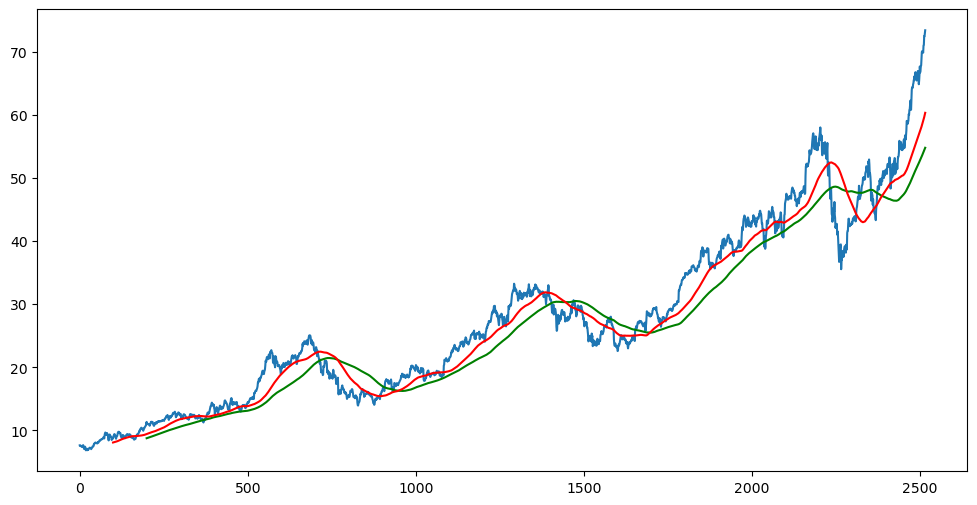

In [135]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [136]:
df.shape

(2516, 5)

In [137]:


# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])#70% data 

data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])#30% left data

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [138]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [139]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#scaling down data within range of 0-1

In [141]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [142]:
#define 2 empty list
x_train = []
y_train = []
#we are predicting value by seeing stock price of last 100 days
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
                   
x_train,y_train =np.array(x_train),np.array(y_train)

In [143]:
#ml model


In [144]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [145]:

from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential

#sequence_length, which indicates how many time steps (data points) are considered in each sequence input to the model.
sequence_length = 100  # Replace with the actual sequence length
num_features = 1       # Number of input features (in this case, just 'close' price)


model = Sequential()# Create a sequential model
# Adding the first LSTM layer with 50 units/neurons
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, num_features)))
# Adding dropout regularization to the model
model.add(Dropout(0.2))# Drop 20% of the neurons during training-prevents overfitting
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Adding the output layer with 1 neuron (for regression)
model.add(Dense(units=1))  # Output layer




In [146]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_20 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_28 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_21 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_29 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_22 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_30 (LSTM)              (None, 120)             

In [147]:

# Compile the model The Adam optimizer is an optimization algorithm commonly used in neural networks, and the mean squared error loss is suitable for regression tasks where you're predicting continuous values.
model.compile(optimizer='adam', loss='mean_squared_error')

# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model with validation data
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/50
42/42 [==============================] - 27s 365ms/step - loss: 0.0933 - val_loss: 0.0266
Epoch 2/50
42/42 [==============================] - 13s 318ms/step - loss: 0.0161 - val_loss: 0.0036
Epoch 3/50
42/42 [==============================] - 15s 359ms/step - loss: 0.0128 - val_loss: 0.0041
Epoch 4/50
42/42 [==============================] - 15s 366ms/step - loss: 0.0117 - val_loss: 0.0045
Epoch 5/50
42/42 [==============================] - 15s 359ms/step - loss: 0.0104 - val_loss: 0.0024
Epoch 6/50
42/42 [==============================] - 14s 332ms/step - loss: 0.0092 - val_loss: 0.0040
Epoch 7/50
42/42 [==============================] - 13s 316ms/step - loss: 0.0088 - val_loss: 0.0030
Epoch 8/50
42/42 [==============================] - 15s 361ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 9/50
42/42 [==============================] - 16s 375ms/step - loss: 0.0096 - val_loss: 0.0040
Epoch 10/50
42/42 [==============================] - 16s 372ms/step - loss: 0.0080 - val_lo

In [148]:
# Save the model
model.save('stock_trend_model.keras')

# Load the saved model
loaded_model = load_model('stock_trend_model.keras')

In [149]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [156]:
past_100_days = data_training.tail(100)

In [158]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [159]:
final_df.head()


,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [160]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [161]:
input_data.shape

(855, 1)

In [162]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [163]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(755, 100, 1)
(755,)


In [164]:
#make predictions  
y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 119ms/step


In [165]:
y_predicted.shape

(755, 1)

In [166]:
y_test

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

In [167]:
y_predicted

array([[0.12566546],
       [0.12627575],
       [0.12687454],
       [0.12745063],
       [0.12799577],
       [0.12850809],
       [0.12899321],
       [0.12946041],
       [0.12992017],
       [0.13038036],
       [0.13084288],
       [0.13131034],
       [0.13178661],
       [0.1322722 ],
       [0.13276577],
       [0.13326538],
       [0.13376746],
       [0.13427679],
       [0.13480452],
       [0.13535912],
       [0.13594326],
       [0.13655254],
       [0.13721776],
       [0.13799152],
       [0.13891742],
       [0.14003092],
       [0.1413462 ],
       [0.1428867 ],
       [0.14466175],
       [0.14666408],
       [0.14887856],
       [0.1512947 ],
       [0.15390232],
       [0.15668169],
       [0.15958188],
       [0.16258916],
       [0.1656866 ],
       [0.16884756],
       [0.17203942],
       [0.17522436],
       [0.17836522],
       [0.18144564],
       [0.18445164],
       [0.18737108],
       [0.19019105],
       [0.1928993 ],
       [0.1954811 ],
       [0.197

In [168]:
scaler.scale_

array([0.02099517])

In [169]:
scale_factor=(1/0.02099517)
y_predicted =y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

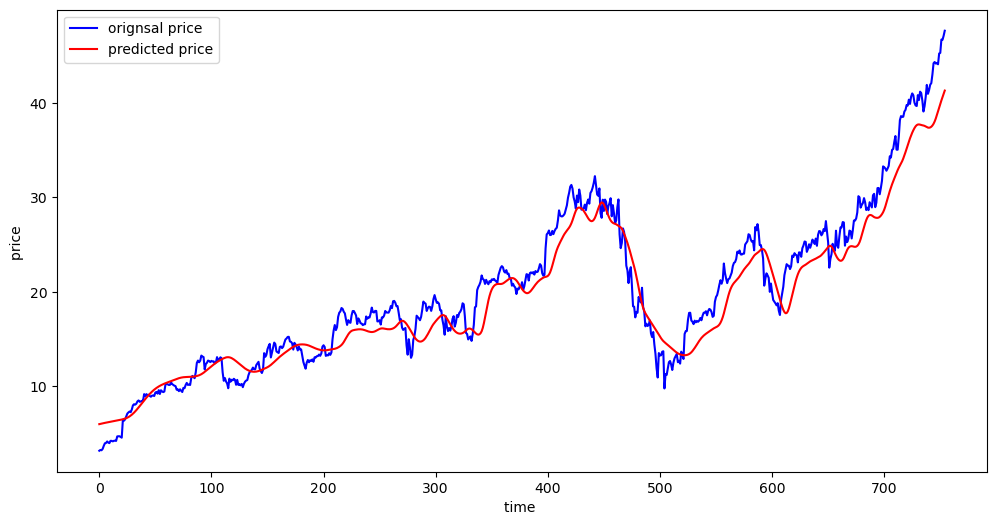

In [170]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='orignsal price')
plt.plot(y_predicted,'r', label='predicted price')
plt.xlabel('time ')
plt.ylabel('price ')
plt.legend()
plt.show